In [26]:
import numpy as np
import pandas as pd
import urllib2
from sklearn.datasets import load_svmlight_file
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
%matplotlib inline

---
Support Vector Machines
=====
***

#####A binary classification example using a 50000 sample database, with each sample having a dimension of 22 features
#####The features were produced by a 10-cylinder internal combustion engine
#####The target, y, is 1 or -1 indicative of normal engine function, or engine misfiring
#####The training set is skewed, containing many more examples of an engine misfiring

In [19]:
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/ijcnn1.bz2'

In [20]:
with open('ijcnn1.bz2', 'wb') as W:
    W.write(urllib2.urlopen(target_page).read())

In [21]:
X, y = load_svmlight_file('ijcnn1.bz2')

In [22]:
print X.shape
print y.shape

(49990, 22)
(49990,)


In [23]:
X = X.todense()

In [24]:
X[0,:]

matrix([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,  -7.31854000e-01,   1.73431000e-01,
           0.00000000e+00,   2.70000000e-04,   1.16840000e-02,
          -1.10520000e-02,   2.44520000e-02,   8.33700000e-03,
           1.32400000e-03,   2.55440000e-02,  -4.07280000e-02,
          -8.10000000e-04]])

In [25]:
print y

[-1. -1. -1. ..., -1. -1. -1.]


###Write a short routine to optimize over the 2 SVM parameters C, and gamma

#####Suggest you only try 3 values of each at a time
#####A good start for C might be 0.1, 1.0, 10.0
#####A good start for gamma might be  0.1, 1.0, 10.0
#####Make multiple runs and try and optimize these values
#####Cross-validate to maximize the f1-score and record the best f1 model (search sklearn for f1_score to learn how to get this as a separate value)
#####Cross-validate to maximize the accuracy and record the best model

In [11]:
my_SSS = StratifiedShuffleSplit(y, 1, test_size=0.5, random_state=101)

In [40]:
C_range = [10, 50, 100, 150]
gamma_range = [0.25, 0.5, 0.75, 1.0, 1.25, 5.0]
max_score = -1.0e99
max_f1_score = -1.0e99
model_count = -1
model_f1_count = -1
count = 0
for train_index, test_index in my_SSS:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for C_param in C_range:
        for g_param in gamma_range:
    
            clf = SVC(C=C_param, gamma = g_param, kernel = 'rbf', \
                      cache_size = 800, random_state = 101)
            #, class_weight = {1:10}
            clf.fit(X_train, y_train)
            
            my_score = clf.score(X_test, y_test)
            my_f1_score = f1_score(y_test, clf.predict(X_test))
            print "C = {:5.2f}, gamma = {:5.2f}, accuracy = {:5.5f}, f1-score = {:5.5f}".format(C_param, g_param, my_score, my_f1_score) 
            if my_score > max_score:
                max_score = my_score
                best_clf = clf
                model_count = count
            if my_f1_score > max_f1_score:
                max_f1_score = my_f1_score
                best_f1_clf = clf
                model_f1_count = count
            count += 1

C = 10.00, gamma =  0.25, accuracy = 0.97600, f1-score = 0.86690
C = 10.00, gamma =  0.50, accuracy = 0.98140, f1-score = 0.89867
C = 10.00, gamma =  0.75, accuracy = 0.98404, f1-score = 0.91380
C = 10.00, gamma =  1.00, accuracy = 0.98524, f1-score = 0.92076
C = 10.00, gamma =  1.25, accuracy = 0.98624, f1-score = 0.92659
C = 10.00, gamma =  5.00, accuracy = 0.98728, f1-score = 0.93240
C = 50.00, gamma =  0.25, accuracy = 0.98132, f1-score = 0.89951
C = 50.00, gamma =  0.50, accuracy = 0.98572, f1-score = 0.92419
C = 50.00, gamma =  0.75, accuracy = 0.98696, f1-score = 0.93119
C = 50.00, gamma =  1.00, accuracy = 0.98720, f1-score = 0.93272
C = 50.00, gamma =  1.25, accuracy = 0.98688, f1-score = 0.93115
C = 50.00, gamma =  5.00, accuracy = 0.98588, f1-score = 0.92539
C = 100.00, gamma =  0.25, accuracy = 0.98336, f1-score = 0.91111
C = 100.00, gamma =  0.50, accuracy = 0.98644, f1-score = 0.92853
C = 100.00, gamma =  0.75, accuracy = 0.98720, f1-score = 0.93274
C = 100.00, gamma =  1

#####Print out a classification report for the best f1 model and the best accuracy model
#####Print out a confusion matrix for the best f1 model and the best accuracy model

In [41]:
print "count is {:d}, count f1 is {:d}".format(model_count, model_f1_count)
print "Best accuracy is {:5.5f}".format(max_score)
print "Best f1 is {:5.5f}".format(max_f1_score)

count is 5, count f1 is 14
Best accuracy is 0.98728
Best f1 is 0.93274


In [44]:
y_hat = best_clf.predict(X_test)
print max_score
print(classification_report(y_test, y_hat))
cm = pd.crosstab(y_test, y_hat,rownames=["Actual"], colnames=["Predicted"])
cm

0.987277455491
             precision    recall  f1-score   support

       -1.0       0.99      1.00      0.99     22568
        1.0       0.96      0.90      0.93      2427

avg / total       0.99      0.99      0.99     24995



Predicted,-1.0,1.0
Actual,,
-1,22484,84
1,234,2193


In [46]:
y_f1_hat = best_f1_clf.predict(X_test)
print max_f1_score
print(classification_report(y_test, y_f1_hat))
cm = pd.crosstab(y_test, y_f1_hat,rownames=["Actual"], colnames=["Predicted"])
cm

0.932744850778
             precision    recall  f1-score   support

       -1.0       0.99      1.00      0.99     22568
        1.0       0.95      0.91      0.93      2427

avg / total       0.99      0.99      0.99     24995



Predicted,-1.0,1.0
Actual,,
-1,22456,112
1,208,2219


#####Is one a better result than the other??? Which one would you choose????

#####Produce and plot an ROC curve for your result
#####While you can get the SVM to produce proabilities you can also use the built in method "decision_function" to produce the roc curve - look up the sklearn documentation

In [48]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, best_f1_clf.decision_function(X_test))
roc_auc = auc(false_pos_rate, true_pos_rate)
print "Area under the ROC curve : %f" % roc_auc

Area under the ROC curve : 0.993386


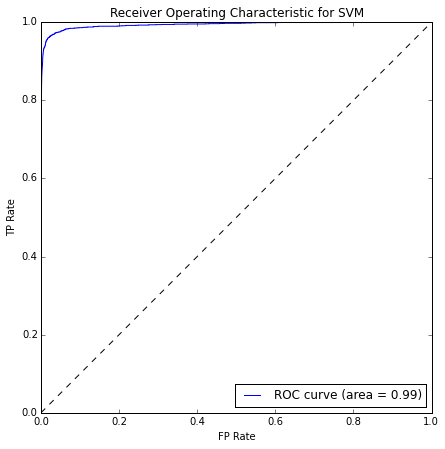

In [49]:
fig = plt.figure(figsize = (7, 7))
ax = plt.subplot(111)
ax.plot(false_pos_rate, true_pos_rate, label='ROC curve (area = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim(0., 1.)
ax.set_ylim(0., 1.)
ax.set_xlabel("FP Rate")
ax.set_ylabel("TP Rate")
ax.set_title("Receiver Operating Characteristic for SVM")
ax.legend(loc="lower right")

#####Now break out the Logistic Regression and use polynomial features - can you get a better model fit??

---
Logistic Regression - Non-linear
=====
***

In [50]:
for train_index, test_index in my_SSS:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clfLR = make_pipeline(PolynomialFeatures(3), LogisticRegression(C=100))
    clfLR.fit(X_train, y_train)
    print clfLR.score(X_test, y_test)

0.983956791358


In [82]:
y_hat = clfLR.predict(X_test)
print clfLR.score(X_test, y_test)
print(classification_report(y_test, y_hat))
cm = pd.crosstab(y_test, y_hat,rownames=["Actual"], colnames=["Predicted"])
cm

0.983956791358
             precision    recall  f1-score   support

       -1.0       0.99      0.99      0.99     22568
        1.0       0.94      0.89      0.92      2427

avg / total       0.98      0.98      0.98     24995



Predicted,-1.0,1.0
Actual,,
-1,22433,135
1,266,2161


In [74]:
probs = clfLR.predict_proba(X_test)
print probs.shape
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, probs[:,1])
roc_auc = auc(false_pos_rate, true_pos_rate)
print "Area under the ROC curve : %f" % roc_auc

(24995, 2)
Area under the ROC curve : 0.993608


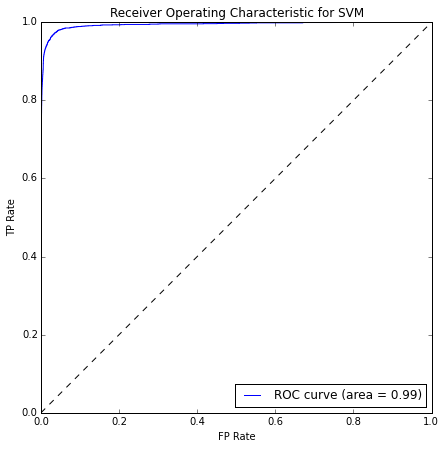

In [75]:
fig = plt.figure(figsize = (7, 7))
ax = plt.subplot(111)
ax.plot(false_pos_rate, true_pos_rate, label='ROC curve (area = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim(0., 1.)
ax.set_ylim(0., 1.)
ax.set_xlabel("FP Rate")
ax.set_ylabel("TP Rate")
ax.set_title("Receiver Operating Characteristic for SVM")
ax.legend(loc="lower right")

---
Logistic Regression - Linear
=====
***

In [76]:
for train_index, test_index in my_SSS:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clfLRb = LogisticRegression(C=100)
    clfLRb.fit(X_train, y_train)
    print clfLRb.score(X_test, y_test)

0.924704940988


In [84]:
y_hat = clfLRb.predict(X_test)
print clfLRb.score(X_test, y_test)
print(classification_report(y_test, y_hat))
cm = pd.crosstab(y_test, y_hat,rownames=["Actual"], colnames=["Predicted"])
cm

0.924704940988
             precision    recall  f1-score   support

       -1.0       0.94      0.98      0.96     22568
        1.0       0.71      0.38      0.50      2427

avg / total       0.91      0.92      0.91     24995



Predicted,-1.0,1.0
Actual,,
-1,22181,387
1,1495,932


In [85]:
probs = clfLRb.predict_proba(X_test)
print probs.shape
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, probs[:,1])
roc_auc = auc(false_pos_rate, true_pos_rate)
print "Area under the ROC curve : %f" % roc_auc

(24995, 2)
Area under the ROC curve : 0.930068


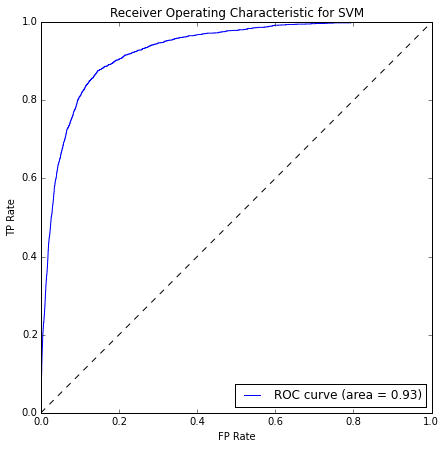

In [86]:
fig = plt.figure(figsize = (7, 7))
ax = plt.subplot(111)
ax.plot(false_pos_rate, true_pos_rate, label='ROC curve (area = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim(0., 1.)
ax.set_ylim(0., 1.)
ax.set_xlabel("FP Rate")
ax.set_ylabel("TP Rate")
ax.set_title("Receiver Operating Characteristic for SVM")
ax.legend(loc="lower right")